## Q.2.

Write the code to implement Barabasi-Albert (BA) algorithm for generation of scale free networks. Vary the size of the initial random network as well as number of nodes and edges added at every stage of evolution. Assess the topology of the final network (minimum 100 instances) in terms of its (a) average clustering coefficient, (b) characteristic path length, and (c) degree distribution.

## Libraries Import

In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
"""
Function         : createInitialGraph
Input Parameters : Initial number of nodes, m0
Purpose          : Create an initial graph with m0 nodes each connected with atleast one edge
Returns          : A Graph containing m0 nodes each connected to each other using atleast one edge
"""

def createInitialGraph(m0, total_edges):
    node_list = [item for item in range(0, m0)]          # To define the nodes
    G = nx.Graph()                                       # Defines a new instance of the graph
    G.add_nodes_from(node_list)                          # The nodes defined are added to the graph without any edges as of now
    
    edges_added = 0                                       # A variable to keep track of the number of edges added
    while edges_added < total_edges:                      # Run the loop until the defined number of edges is not made
        for node in node_list:                               # For each of the node present in the graph
            added_flag = False                               # Initially there is no edge from this node, therefore added_flag is False
            while not added_flag:                            # Until the edge from current node is added into the graph
                random_vertex = random.randint(0, m0-1)      # Pick a random vertex to which the current node will be connected to
                if random_vertex != node:                    # Ensure that the random vertex selected is not the same as the current node
                    if not G.has_edge(random_vertex, node):  # Also ensure that these two nodes are not connected before
                        G.add_edge(random_vertex, node)      # If above conditions are satisfied, then add the edge between these nodes
                        added_flag = True                    # Set the flag to True
                        edges_added += 1                     # Increment the edge count
    return G                                             # Returns the Graph thus obtained

In [3]:
"""
Function         : getRandomNode
Input Parameters : Graph, degree list of the Graph
Purpose          : Finds the node whose probability is greater than a random number
Returns          : Returns the node whose probability is greater than a random number
"""

def getRandomNode(G, degree_list):
    
    node_list = G.nodes()                                      # Gets the list of nodes
    degree_dict = dict(degree_list)                            # Convert the degree list into a dictionary
    denom_sum = sum(degree_dict.values())                      # Add the value of all degrees ans assigns it to denominator value
    probability_list = []                                      # Declare probability list
    cum_prob = []                                              # Declare Cumulative probability list
    prev_prob = 0                                              # Initialize cumulative probability value
    
    for node in G.nodes():                                     # For each node in the Graph
        degree_node = G.degree(node)                           # Get the degree of the node in the iteration
        prob = degree_node/denom_sum                           # Calculate the probability value
        prev_prob += prob                                      # Add to the cumulative probability
        probability_list.append(prob)                          # Append the probability value to the probability list
        cum_prob.append(prev_prob)                             # Store the cumulative probability in the cum_prob list

    random_num = random.uniform(0, 1)                          # Generate a random number between 0 and 1
    for i in range(len(cum_prob)):                             # For each value present in the cum_prob list
        if cum_prob[i] >= random_num:                          # If the random number selected is less than the current cumulative probability value
            return i                                           # Then return the current node

In [4]:
"""
Function         : barabasiModel
Input Parameters : Graph(G), m(Number of edges to be drawn), m0(Initial number of nodes), n(Total number of nodes)
Purpose          : Connects the new nodes to m previously added nodes and generate a graph in accordance with Barabasi-Albert Model
Returns          : A Graph which satisfies the Barabasi-Albert Model
"""

def barabasiModel(G, m, m0, n):    
    for i in range(m0, n):                                         # For each of the nodes left after making the initial graph
        G.add_node(i)                                              # Add the node into the graph
        degree_list = nx.degree(G)                                 # Find the degree_list of the graph
        
        num_edges = 0                                              # Counter to keep track of number of edges
        while num_edges < m:                                       # Loop until the number of edges is not equal to the count of edges to be connected to
            random_vertex = getRandomNode(G, degree_list)          # Get the node to connect to
            if (i, random_vertex) not in G.edges():                # If the edge is not already present in the graph
                G.add_edge(i, random_vertex)                       # Add the edge into the graph
                num_edges += 1                                     # Increase the count of number of edges
            else:
                pass
    return G                                                       # Return the graph which satisfies the Barabasi-Albert model

In [5]:
"""
Function         : getDegreeDist
Input Parameters : Graph(G), degree distribution dictionary
Purpose          : To add the degree distribution values of the current graph into the degree distribution dictionary already present
Returns          : The degree distribution dictionary with the degree distribution of current graph added to it.
"""
def getDegreeDist(G, degree_distribution_dict):
    degree_list = nx.degree(G)                                    # Get the degree of the nodes in the graph(list of tuples)
    degree_dict = dict(degree_list)                               # Convert the list of tuples obtained into a dictionary
    degree_dist = Counter(degree_dict.values())                   # Find the frequency of occurence of each of the degree
            
    for x, y in degree_dist.items():                              # Loop for each of the degree-frequency pair
        if x in degree_distribution_dict.keys():                  # If that degree is present already
            degree_distribution_dict[x].append(degree_dist[x])    # Append that to already existing list
        else:
            degree_distribution_dict[x] = []                      # Else create new list
            degree_distribution_dict[x].append(degree_dist[x])    # Store the value into the new list corresponding to the degree
    return degree_distribution_dict                               # Returns the degree distribution dictionary

In [6]:
"""
Function         : getMeanStd
Input Parameters : degree distribution dictionary and number of nodes in the graph
Purpose          : To get the mean dictionary, std deviation dictionary and their corresponding lists
Returns          : The mean dictionary, std deviation dictionary and their corresponding lists.
"""
def getMeanStd(degree_distribution_dict, num_nodes):
    mean_dict = {}
    std_dev_dict = {}
    for x, y in degree_distribution_dict.items():
        mean = np.mean(y)/num_nodes                                    # Calculates Mean of the values
        std_dev = np.std(y)/num_nodes                                  # Calculates standard deviation of the values
        mean_dict[x] = mean
        std_dev_dict[x] = std_dev

    mean_list = []
    std_list = []
    for x in sorted(mean_dict):
        mean_list.append(mean_dict[x])                                 # Creates mean list
        std_list.append(std_dev_dict[x])                               # Creates standard deviation list
    return mean_dict, std_dev_dict, mean_list, std_list

In [7]:
"""
Function         : plotDegreeDist
Input Parameters : mean dictionary, mean list, std deviation list, scale and power
Purpose          : To Plot the error bar
Returns          : Shows the plot and returns nothing
"""
def plotDegreeDist(mean_dict, mean_list, std_list, scale = 'log'):

    # For degree distribution and plot the degree distribution
    fig = plt.figure(figsize = (15,15))                                          # Sets the figure size

    plt.errorbar(np.array(sorted(mean_dict)), mean_list, std_list, fmt='ok')     # Plots the error bar
    if scale == 'log':                                                           # If scale selected is log scale
        ax=plt.gca()
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.title('Degree Distribution for Barabasi Albert Model Graph')             # Sets the title of the Plot
    plt.xlabel('Degree(k)')                                                      # Sets the x axis label 
    plt.ylabel('Pk')                                                             # Sets the y axis label
    plt.show()                                                                   # Shows the plot

In [8]:
"""
Function         : plotDegreeDistNormal
Input Parameters : mean dictionary, mean list, std deviation list and scale
Purpose          : To Plot the scatter plot
Returns          : Shows the plot and returns nothing
"""
def plotDegreeDistNormal(mean_dict, mean_list, std_list, scale = 'log'):

    # For degree distribution and plot the degree distribution
    fig = plt.figure(figsize = (15,15))                                          # Sets the figure size

    plt.scatter(np.array(sorted(mean_dict)), mean_list)                          # Plots the scatter plot
    if scale == 'log':                                                           # If scale selected is log scale
        ax=plt.gca()
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.title('Degree Distribution for Barabasi Albert Model Graph')             # Sets the title of the Plot
    plt.xlabel('Degree(k)')                                                      # Sets the x axis label 
    plt.ylabel('Pk')                                                             # Sets the y axis label
    plt.show()                                                                   # Shows the plot

In [9]:
n = 1500                                            # Total number of nodes

char_path_length_list = []                          # Declare charcteristic path length list
clustering_coefficient_list = []                    # Declare clustering coefficient list
degree_distribution_dict = {}                       # Declare degree distribution dictionary
m0 = 10                                             # Setting the initial number of nodes
print("Random nodes m0:", m0)
edges_to_be_added = 20                              # Setting the number of edges in the initial graph
print("Total edges added to initial random graph:", edges_to_be_added)
m = 6                                  # Sets the m value, the count of number of edges the newly added node will connect to
print("Number of nodes the newly added node will be connected to:", m)
for i in range(100):                                # Loop for 100 instances
    print("Running instance:", str(i+1))  
    G = createInitialGraph(m0, edges_to_be_added)   # Creates the initial graph of m0 nodes by calling createInitialGraph method
    G = barabasiModel(G, m, m0, n)                  # Generates a Barabasi Albert Graph
    if i == 0:
        print("Number of edges in Barabasi Albert Model:",len(G.edges()))
    char_path_length = nx.average_shortest_path_length(G)     # Computes Characteristic Path length
    clustering_coefficient = nx.average_clustering(G)         # Computes clustering coefficient
    char_path_length_list.append(char_path_length)            # Appends characteristic path length to its list
    clustering_coefficient_list.append(clustering_coefficient)# Appends clustering coefficient to its list
    
    degree_distribution_dict = getDegreeDist(G, degree_distribution_dict)  # Get degree distribution of current instance into the dictionary
    
print("\nAverage characteristic path length over 100 instances:", np.mean(char_path_length_list))
print("\nAverage clustering coefficient over 100 instances:", np.mean(clustering_coefficient_list))
mean_dict, std_dev_dict, mean_list, std_list = getMeanStd(degree_distribution_dict, n) # Get mean and std dev of degree distribution

Random nodes m0: 10
Total edges added to initial random graph: 20
Number of nodes the newly added node will be connected to: 6
Running instance: 1
Number of edges in Barabasi Albert Model: 8960
Running instance: 2
Running instance: 3
Running instance: 4
Running instance: 5
Running instance: 6
Running instance: 7
Running instance: 8
Running instance: 9
Running instance: 10
Running instance: 11
Running instance: 12
Running instance: 13
Running instance: 14
Running instance: 15
Running instance: 16
Running instance: 17
Running instance: 18
Running instance: 19
Running instance: 20
Running instance: 21
Running instance: 22
Running instance: 23
Running instance: 24
Running instance: 25
Running instance: 26
Running instance: 27
Running instance: 28
Running instance: 29
Running instance: 30
Running instance: 31
Running instance: 32
Running instance: 33
Running instance: 34
Running instance: 35
Running instance: 36
Running instance: 37
Running instance: 38
Running instance: 39
Running instance

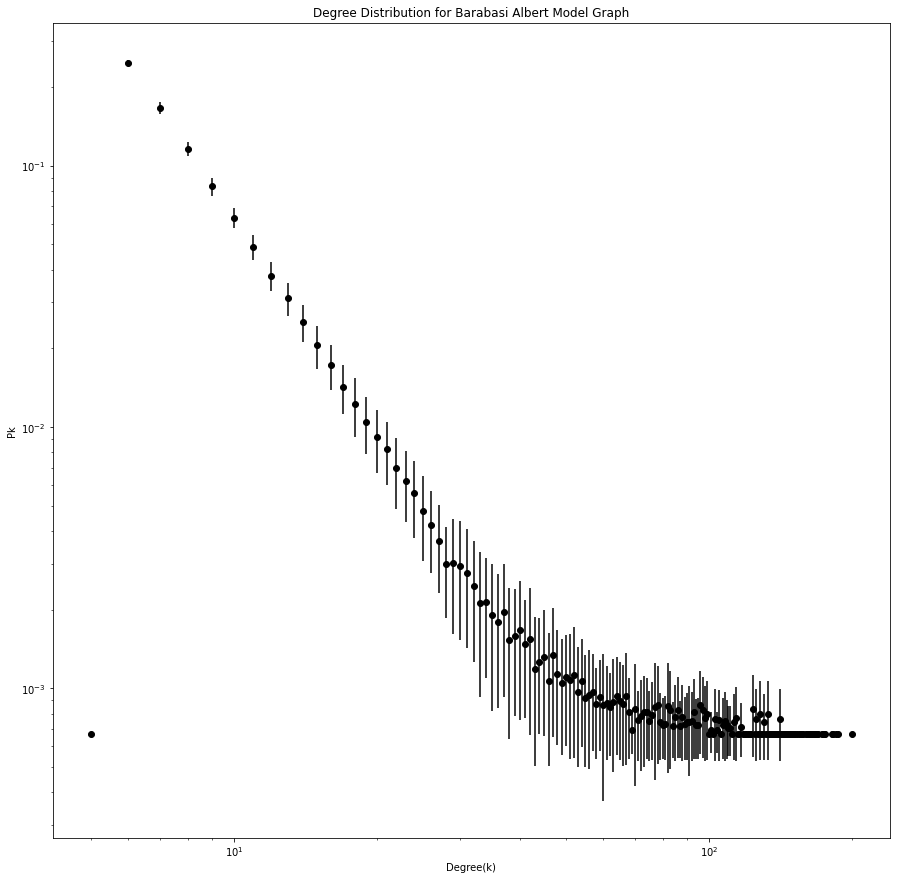

In [11]:
plotDegreeDist(mean_dict, mean_list, std_list)     # Plots the mean and std dev of degree distribution with log log scale

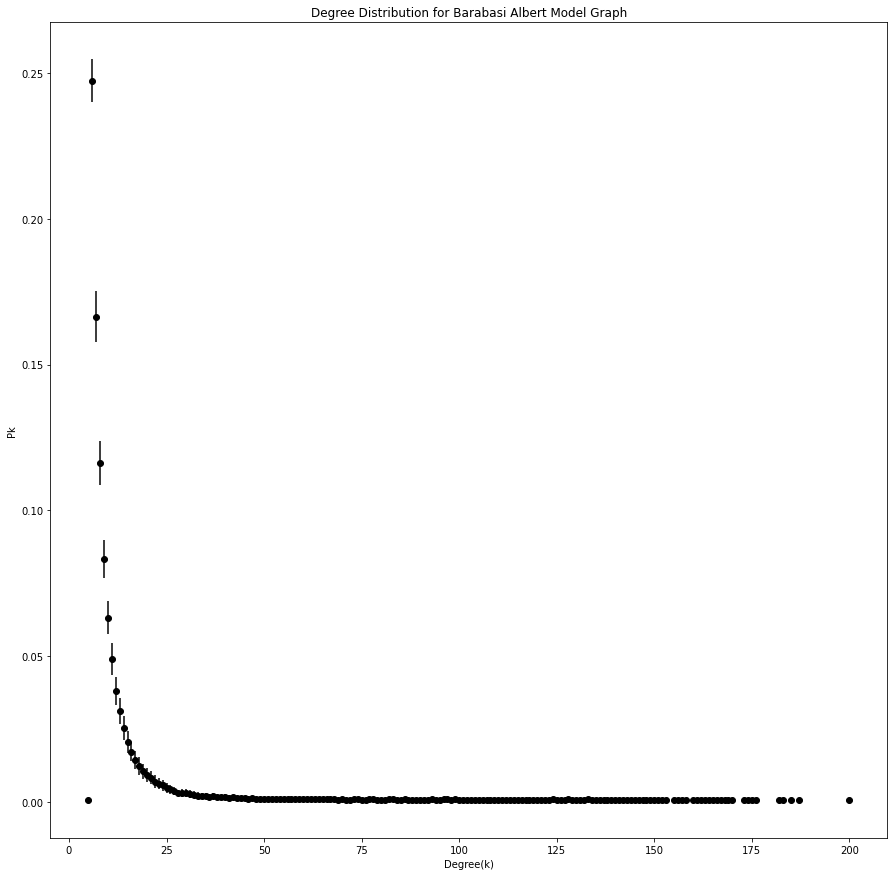

In [12]:
plotDegreeDist(mean_dict, mean_list, std_list, scale='normal')  # Plots the mean and std dev of degree distribution with linear scale

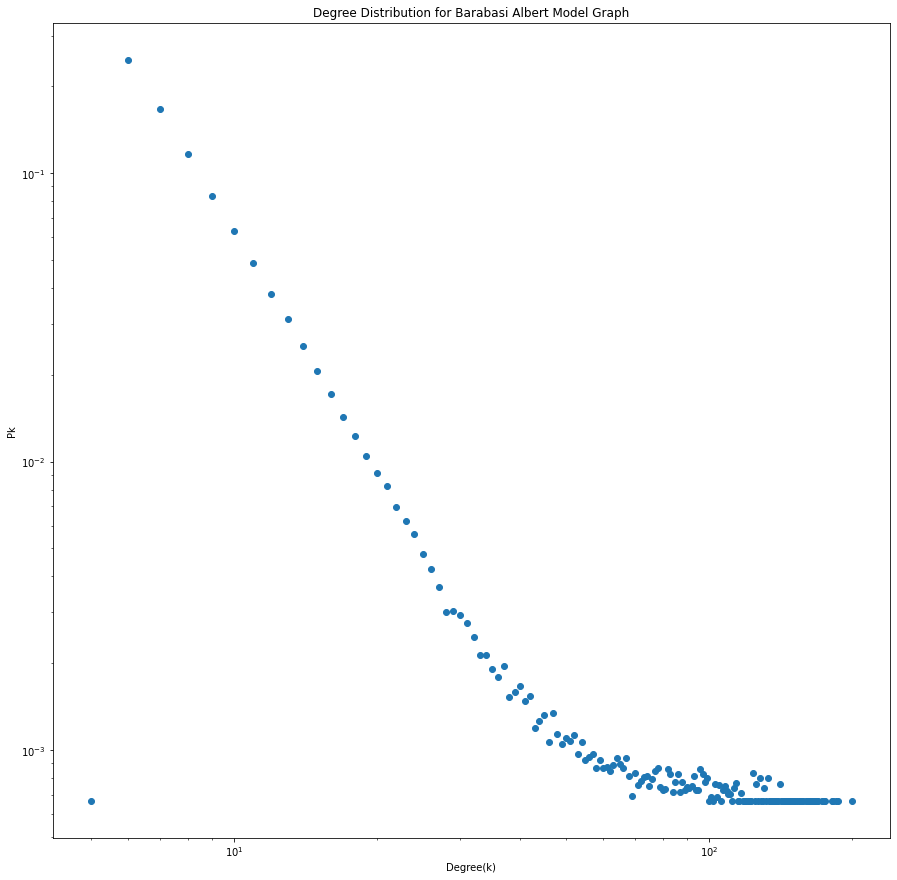

In [13]:
plotDegreeDistNormal(mean_dict, mean_list, std_list, scale = 'log') # Plots the degree distribution graph with log log scale

From the Barabasi-Albert Model implemented above for 1500 nodes using Growth and Preferential Attachment concept, we can infer that it follows the Power law distribution as can be seen in the second plot and we can also see the presence of hubs in the degree distribution plot(third plot). Also, in the first plot, we can see that the mean and standard deviation of the degree distribution plot has been shown on the log-log scale and tries to exhibit the Power law distribution and shows the presence of hubs(in the tail) with almost zero std deviation. This also depicts the scale free nature of the network obtained by Barabasi Albert Model.

The initial random network created consisted of 10 nodes and 20 edges and at each iteration 1 node with 6 edges were added to it.

Average characteristic path length over 100 instances: 2.961941774516344

Average clustering coefficient over 100 instances: 0.03128995462134849